Layer Explaination

In [1]:
import tensorflow as tf

Input Image

input으로 들어갈 DataSet을 들여다보면서 시각화

패키지 로드
- os
- glob
- matplotlib

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from tensorflow.keras import datasets

(train_x, train_y), (test_x, test_y) = datasets.mnist.load_data()

In [4]:
image = train_x[0]

이미지를 열면 shape 확인하기

In [5]:
image.shape

(28, 28)

차원수 확인하기 [batch_size, height, width, channel]

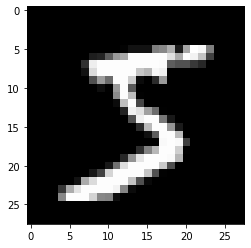

In [6]:
plt.imshow(image,'gray')
plt.show()

In [7]:
image = image[tf.newaxis, ..., tf.newaxis]
image.shape

(1, 28, 28, 1)

Feature Extraction
- convolution
- pulling


Convolution
- filters: layer에서 나갈 때 몇개의 filter르 만들지 정함(aka weights, filters, channels)
- kernel_size : filter(Weight)의 사이즈
- strides : 몇 개의 pixel을 skip하면서 훑어지갈 것이지 정함(사이즈에 영향)
- padding : zero padding을 만들 것인지, VALID는 padding이 없고, Same은 padding이 있음(사이즈 영향줌)
- activation : activation function을 만들것인지, 당장 설저 안해도 layer층을 따로 만들수 있음

In [8]:
tf.keras.layers.Conv2D(filters = 3, kernel_size=(3,3), strides = (1,1), padding='SAME', activation='relu')

Visualization

In [9]:
image = tf.cast(image, dtype=tf.float32)
image.dtype

tf.float32

In [10]:
layer = tf.keras.layers.Conv2D(5, 3, 1, 'SAME')
layer

In [11]:
output = layer(image)
output.shape

TensorShape([1, 28, 28, 5])

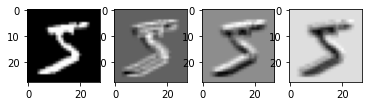

In [12]:
plt.subplot(2,4,1)
plt.imshow(image[0,:,:,0], 'gray')
plt.subplot(2,4,2)
plt.imshow(output[0,:,:,0], 'gray')
plt.subplot(2,4,3)
plt.imshow(output[0,:,:,1], 'gray')
plt.subplot(2,4,4)
plt.imshow(output[0,:,:,2], 'gray')
plt.show()

weight 불러오기
  - layer.get_weight()

In [13]:
weight = layer.get_weights()
weight[0].shape, weight[1].shape # weight, bias

((3, 3, 1, 5), (5,))

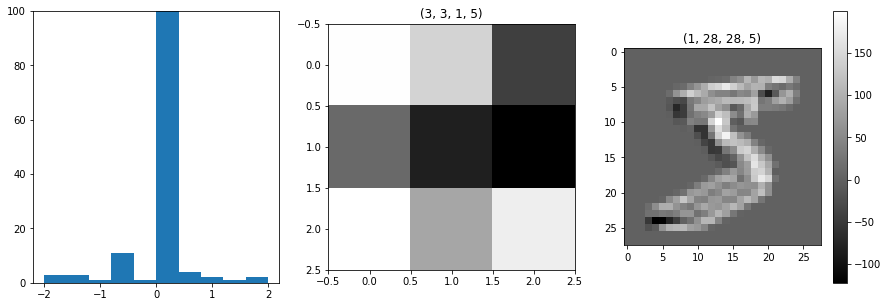

In [14]:
plt.figure(figsize = (15,5))
plt.subplot(1,3,1)
plt.hist(output.numpy().ravel(), range=[-2,2])
plt.ylim(0,100)

plt.subplot(1,3,2)
plt.title(weight[0].shape)
plt.imshow(weight[0][:,:,0,0,], 'gray')

plt.subplot(1,3,3)
plt.title(output.shape)
plt.imshow(output[0,:,:,0], 'gray')
plt.colorbar()
plt.show()

Acivation

In [15]:
import numpy as np

In [16]:
tf.keras.layers.ReLU()

In [17]:
act_layer = tf.keras.layers.ReLU()
act_output = act_layer(output)

In [18]:
act_output.shape

TensorShape([1, 28, 28, 5])

In [19]:
np.min(output), np.max(output)

(-357.3596, 199.23315)

In [20]:
np.min(act_output), np.max(act_output)

(0.0, 199.23315)

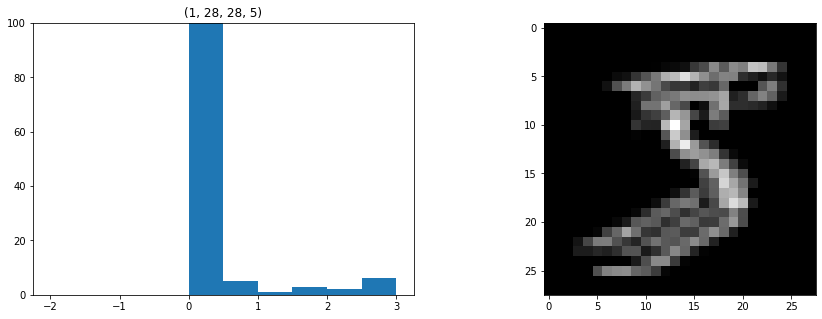

In [21]:
plt.figure(figsize = (15,5))
plt.subplot(121)
plt.hist(act_output.numpy().ravel(),range=[-2, 3])
plt.ylim(0,100)
plt.title(act_output.shape)
plt.subplot(122)
plt.imshow(act_output[0,:,:, 0], 'gray')
plt.show()


Pooling
- tf.keras.layers.Maxpool2D

In [22]:
tf.keras.layers.MaxPool2D(pool_size=(2,2), padding='SAME')

In [23]:
pool_layer = tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='SAME')
pool_output = pool_layer(act_output)

In [24]:
act_output.shape

TensorShape([1, 28, 28, 5])

In [25]:
pool_output.shape

TensorShape([1, 14, 14, 5])

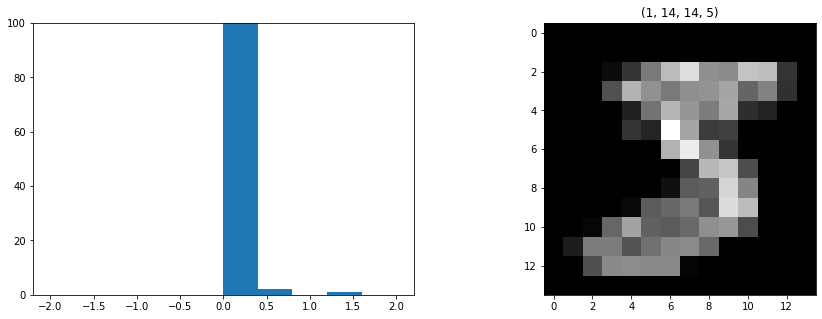

In [26]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.hist(pool_output.numpy().ravel(), range=[-2,2])
plt.ylim(0,100)

plt.subplot(122)
plt.title(pool_output.shape)
plt.imshow(pool_output[0,:,:,0], 'gray')
plt.show()

Fully Connected

flatten
- tf.keras.layers.flatten()

In [27]:
tf.keras.layers.Flatten()

In [28]:
layer = tf.keras.layers.Flatten()

In [29]:
flatten = layer(output)

In [30]:
output.shape

TensorShape([1, 28, 28, 5])

In [31]:
flatten.shape # 28*28*5

TensorShape([1, 3920])

In [32]:
flatten.numpy().ravel().shape

(3920,)

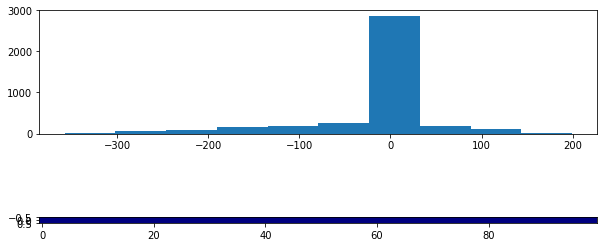

In [33]:
plt.figure(figsize=(10,5))
plt.subplot(211)
plt.hist(flatten.numpy().ravel())
plt.subplot(212)
plt.imshow(flatten[:,:100], 'jet')
plt.show()

Dense
- tf.keras.layers.Dense()

In [34]:
tf.keras.layers.Dense(32, activation='relu')

In [35]:
layer = tf.keras.layers.Dense(32, activation='relu')

In [36]:
output = layer(flatten)

In [37]:
output.shape

TensorShape([1, 32])

In [38]:
layer_2 = layer = tf.keras.layers.Dense(10, activation='relu')
output_example = layer_2(output)

In [39]:
output_example.shape

TensorShape([1, 10])

Drop out
- tf.keras.layers.Dropout

In [40]:
layer = tf.keras.layers.Dropout(0.7)
output = layer(output)

In [41]:
output.shape

TensorShape([1, 32])

Build Model

In [42]:
from tensorflow.keras import layers

In [43]:
input_shape = (28,28,1)
num_classes = 10

In [44]:
inputs = layers.Input(shape = input_shape)

# feature extraction
net = layers.Conv2D(32,3,padding = 'SAME')(inputs)
net = layers.Activation('relu')(net)
net = layers.Conv2D(32,3,padding = 'SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPool2D((2,2))(net)
net = layers.Dropout(0.25)(net)

net = layers.Conv2D(64,3,padding = 'SAME')(net)
net = layers.Activation('relu')(net)
net = layers.Conv2D(64,3,padding = 'SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPool2D((2,2))(net)
net = layers.Dropout(0.25)(net)

#fully connected
net = layers.Flatten()(net)
net = layers.Dense(512)(net)
net = layers.Activation('relu')(net)
net = layers.Dropout(0.25)(net)
net = layers.Dense(10)(net)
net = layers.Activation('softmax')(net)

model = tf.keras.Model(inputs=inputs, outputs=net , name ='Basic_CNN')

In [45]:
model

In [46]:
model.summary()

Model: "Basic_CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0 